## Pricing with Fourier approach

### 1- Black Scholes Eur

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

from pricing_python.diffusion import BlackScholesProcess
from pricing_python.european import eur_bs_analytical_price, eur_fourier_price

In [2]:
sigma = 0.2
riskfree = 0.05
maturity = 1
S0 = 100
K = 110
model = BlackScholesProcess(sigma=sigma)

In [ ]:
# Eur call

npv_analytical, npv_fourier_5, npv_fourier_10, npv_fourier_15 = [], [], [], []
s_vals = list(range(50, 160))

strtime = datetime.now()
for s in s_vals:
    npv_analytical.append(eur_bs_analytical_price(s, K, riskfree, sigma, maturity, call=True))
t1 = datetime.now()
for s in s_vals:
    npv_fourier_5.append(eur_fourier_price(model, s, K, riskfree, maturity, call=True, n_coef=5))
t2 = datetime.now()
for s in s_vals:
    npv_fourier_15.append(eur_fourier_price(model, s, K, riskfree, maturity, call=True, n_coef=15))
t3 = datetime.now()
for s in s_vals:
    npv_fourier_30.append(eur_fourier_price(model, s, K, riskfree, maturity, call=True, n_coef=30))
endtime = datetime.now()
    
mae_5 = np.mean(np.abs(np.array(npv_fourier_5)-np.array(npv_analytical)))
mae_10 = np.mean(np.abs(np.array(npv_fourier_10)-np.array(npv_analytical)))
mae_15 = np.mean(np.abs(np.array(npv_fourier_15)-np.array(npv_analytical)))

In [ ]:
textstr = '\n'.join((
    r'Fourier 5 coef: MAE {},  Solving exec. {}s'.format(np.round(mae_5, 5), np.round((t2-t1).total_seconds(), 4)),
    r'Fourier 10 coef: MAE {},  Solving exec. {}s'.format(np.round(mae_10, 4), np.round((t3-t2).total_seconds(), 4)),
    r'Fourier 15 coef:     MAE {},  Solving exec. {}s'.format(np.round(mae_15, 6), np.round((endtime-t3).total_seconds(), 4))))

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

plt.figure()
plt.figure(figsize = (10,6))
plt.plot(s_vals, npv_analytical, color='black', label='BS Analytical')
plt.plot(s_vals, npv_fourier_5, label='Fourier 5 coef')
plt.plot(s_vals, npv_fourier_10, label='Fourier 10 coef')
plt.plot(s_vals, npv_fourier_15, label='Fourier 15 coef')
plt.text(0.0, 80., textstr, fontsize=14,
        verticalalignment='top', bbox=props)
plt.legend(prop={"size":13})
plt.title("Call option values at t=0", fontsize=14)
plt.xlabel("Underlying price", fontsize=14)
plt.ylabel("Option value", fontsize=14)
plt.show()

In [3]:
# Eur put
npv_analytical, npv_fourier_5, npv_fourier_15, npv_fourier_30 = [], [], [], []
s_vals = list(range(50, 160))

strtime = datetime.now()
for s in s_vals:
    npv_analytical.append(eur_bs_analytical_price(s, K, riskfree, sigma, maturity, call=False))
t1 = datetime.now()
for s in s_vals:
    npv_fourier_5.append(eur_fourier_price(model, s, K, riskfree, maturity, call=False, n_coef=5))
t2 = datetime.now()
for s in s_vals:
    npv_fourier_15.append(eur_fourier_price(model, s, K, riskfree, maturity, call=False, n_coef=15))
t3 = datetime.now()
for s in s_vals:
    npv_fourier_30.append(eur_fourier_price(model, s, K, riskfree, maturity, call=False, n_coef=30))
endtime = datetime.now()

In [4]:
mae_5 = np.mean(np.abs(np.array(npv_fourier_5)-np.array(npv_analytical)))
mae_15 = np.mean(np.abs(np.array(npv_fourier_15)-np.array(npv_analytical)))
mae_30 = np.mean(np.abs(np.array(npv_fourier_30)-np.array(npv_analytical)))

<Figure size 432x288 with 0 Axes>

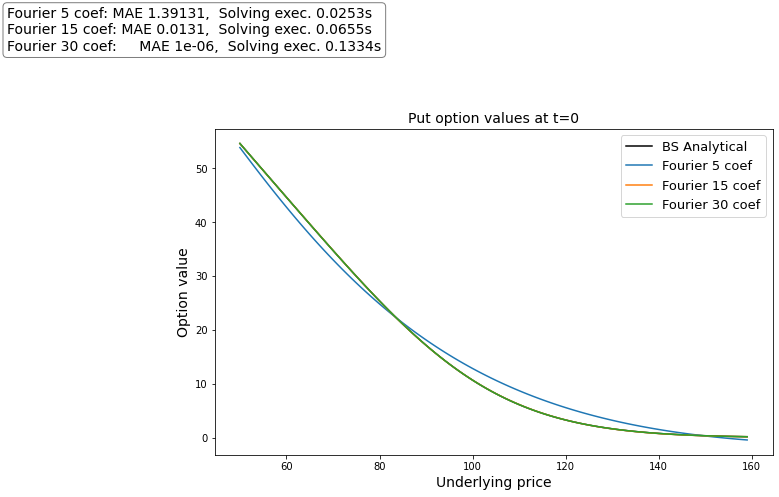

In [5]:
textstr = '\n'.join((
    r'Fourier 5 coef: MAE {},  Solving exec. {}s'.format(np.round(mae_5, 5), np.round((t2-t1).total_seconds(), 4)),
    r'Fourier 15 coef: MAE {},  Solving exec. {}s'.format(np.round(mae_15, 4), np.round((t3-t2).total_seconds(), 4)),
    r'Fourier 30 coef:     MAE {},  Solving exec. {}s'.format(np.round(mae_30, 6), np.round((endtime-t3).total_seconds(), 4))))

props = dict(boxstyle='round', facecolor='white', alpha=0.5)

plt.figure()
plt.figure(figsize = (10,6))
plt.plot(s_vals, npv_analytical, color='black', label='BS Analytical')
plt.plot(s_vals, npv_fourier_5, label='Fourier 5 coef')
plt.plot(s_vals, npv_fourier_15, label='Fourier 15 coef')
plt.plot(s_vals, npv_fourier_30, label='Fourier 30 coef')
plt.text(0.0, 80., textstr, fontsize=14,
        verticalalignment='top', bbox=props)
plt.legend(prop={"size":13})
plt.title("Put option values at t=0", fontsize=14)
plt.xlabel("Underlying price", fontsize=14)
plt.ylabel("Option value", fontsize=14)
plt.show()


### 2- Heston Eur

In [2]:
from pricing_python.diffusion import HestonProcess
from pricing_python.european import eur_heston_price, eur_mc_price

v_init= 0.3
v = 0.6
kappa = 1
gamma = 0.1
rho = -0.3
model = HestonProcess(v_init, v, kappa, gamma, rho)

In [5]:
npv_mc, std_mc = [], []
s_vals = range(60, 160, 5)

riskfree = 0.05
maturity = 1
S0 = 100
K = 110

strtime = datetime.now()
for s in s_vals:
    print(f's={s}')
    npv_mc.append(eur_mc_price(model, s, K, riskfree, maturity, call=False, n_path=10000, n_step=5000)[0])
    std_mc.append(eur_mc_price(model, s, K, riskfree, maturity, call=False, n_path=10000, n_step=5000)[1])
endtime = datetime.now()
print('exec time MC', (endtime-strtime).total_seconds())
print(npv_mc)
print(std_mc)

s=60
s=65
s=70
s=75
s=80
s=85
s=90
s=95
s=100
s=105
s=110
s=115
s=120
s=125
s=130
s=135
s=140
s=145
s=150
s=155
exec time MC 1089.645087
[49.74257548591815, 46.310612171300946, 43.10275759984768, 40.105009487817895, 37.33433834875415, 34.70139137878971, 32.332666601408576, 30.01268937382712, 27.957427206965008, 26.001246131751795, 24.367253824078993, 22.644081480589495, 21.1154347584026, 19.718303636377044, 18.377865467957662, 17.09265834117447, 15.960083066658182, 14.906199429194697, 14.146348478728509, 13.258186077671493]
[0.04962668096546258, 0.04165532709973299, 0.034674472510380305, 0.030928745385335896, 0.03173089292810098, 0.038900331200702874, 0.04663229445071572, 0.05761817228781454, 0.06773980926277813, 0.07783118366996623, 0.0866251096390677, 0.0958265167108316, 0.1021215811173176, 0.10991853321535691, 0.11275997538118389, 0.11615496876876481, 0.11855468761398374, 0.1192071167503392, 0.1200839266163976, 0.11845161132339965]


In [7]:
npv_fourier, npv_fourier_50, npv_fourier_100 = [], [], []

s_vals = range(60, 160, 5)

riskfree = 0.05
maturity = 1
S0 = 100
K = 110

strtime = datetime.now()
for s in s_vals:
    npv_fourier.append(eur_fourier_price(model, s, K, riskfree, maturity, call=False, n_coef=20))
    npv_fourier_50.append(eur_fourier_price(model, s, K, riskfree, maturity, call=False, n_coef=50))
    npv_fourier_100.append(eur_fourier_price(model, s, K, riskfree, maturity, call=False, n_coef=100))
    
endtime = datetime.now()

<Figure size 432x288 with 0 Axes>

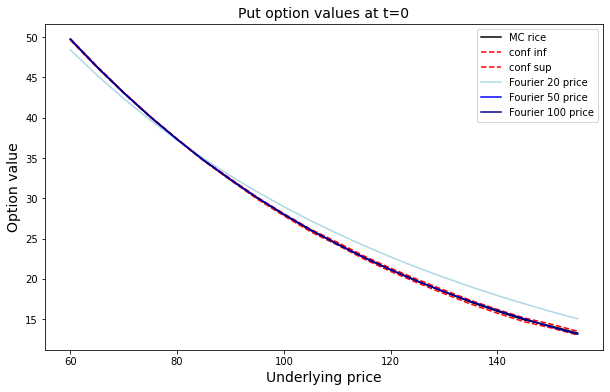

In [8]:
npv_mc = np.array(npv_mc)
conf_sup = np.array([npv_mc[i]+1.96*std_mc[i] for i in range(len(npv_mc))])
conf_inf = np.array([npv_mc[i]-1.96*std_mc[i] for i in range(len(npv_mc))])

plt.figure()
plt.figure(figsize = (10,6))
plt.plot(s_vals, npv_mc, color='black', label='MC rice')
plt.plot(s_vals, conf_sup, color='red', linestyle='--', label='conf inf')
plt.plot(s_vals, conf_inf, color='red', linestyle='--',label='conf sup')
plt.plot(s_vals, np.array(npv_fourier), color='lightblue', label='Fourier 20 price')
plt.plot(s_vals, np.array(npv_fourier_50), color='blue', label='Fourier 50 price')
plt.plot(s_vals, np.array(npv_fourier_100), color='darkblue', label='Fourier 100 price')
plt.title("Put option values at t=0", fontsize=14)
plt.xlabel("Underlying price", fontsize=14)
plt.ylabel("Option value", fontsize=14)
plt.legend()
plt.show()

In [9]:
print(f'MAE: {np.mean(np.abs(np.array(npv_fourier_100)-npv_mc))}')

MAE: 0.04381527290096736


In [10]:
print(npv_fourier_100)

[49.743377685483786, 46.30838067744505, 43.09591193138309, 40.09887482563624, 37.30826154403671, 34.713838308025736, 32.304677371422116, 30.069559951785124, 27.99727403556184, 26.076828582758452, 24.297602475915536, 22.649443327590767, 21.122728314937913, 19.70839667522982, 18.397961390830492, 17.18350588396511, 16.057670178358222, 15.013629909908373, 14.045070728961944, 13.146159985912357]


### 3- Merton Jump diffusion

In [3]:
import numpy as np
from pricing_python.diffusion import MertonJumpProcess

sigma = 0.2
lambda_j=1
m_j = 0
v_j=0.3

model = MertonJumpProcess(sigma, lambda_jump=lambda_j, m_jump=m_j, v_jump=v_j)

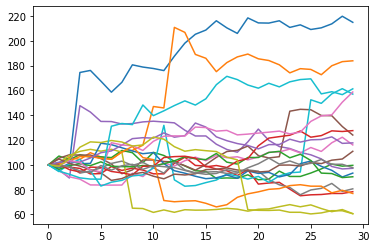

In [3]:
riskfree = 0.05
maturity = 1
S0 = 100
K = 110

paths = model.simulate(20, 30, S0, riskfree, maturity)
plt.plot(paths.T)
plt.show()

In [6]:
from pricing_python.european import eur_merton_analytical_price, eur_mc_price, eur_fourier_price

riskfree = 0.05
maturity = 1
s_vals = range(60, 160, 2)
K = 110
npv_mc, npv_f_20, npv_f_50, npv_f_100, npv = [], [], [], [], []
for s in s_vals:
    npv_f_20.append(eur_fourier_price(model, s, K, riskfree, maturity, call=False, n_coef=20))
    npv_f_50.append(eur_fourier_price(model, s, K, riskfree, maturity, call=False, n_coef=50))
    npv_f_100.append(eur_fourier_price(model, s, K, riskfree, maturity, call=False, n_coef=100))
    npv_mc.append(eur_mc_price(model,s, K,riskfree,maturity, call=False,n_path=10000, n_step=1000))
    npv.append(eur_merton_analytical_price(model, s, K, riskfree, maturity, call=False))

<Figure size 432x288 with 0 Axes>

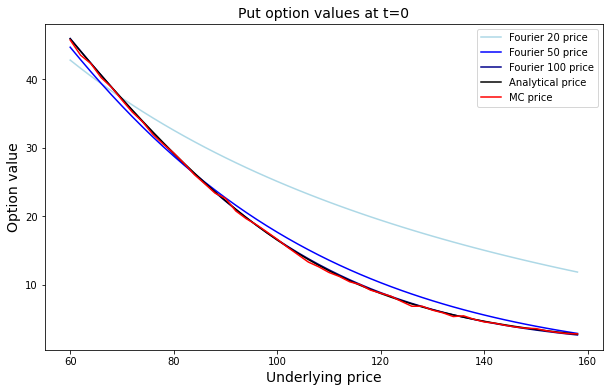

In [7]:
plt.figure()
plt.figure(figsize = (10,6))
plt.plot(s_vals, np.array(npv_f_20), color='lightblue', label='Fourier 20 price')
plt.plot(s_vals, np.array(npv_f_50), color='blue', label='Fourier 50 price')
plt.plot(s_vals, np.array(npv_f_100), color='darkblue', label='Fourier 100 price')
plt.plot(s_vals, np.array(npv), color='black', label='Analytical price')
plt.plot(s_vals, np.array(npv_mc)[:,0], color='red', label='MC price')
plt.title("Put option values at t=0", fontsize=14)
plt.xlabel("Underlying price", fontsize=14)
plt.ylabel("Option value", fontsize=14)
plt.legend()
plt.show()

In [10]:
print('mea Fourier vs Analyt:', np.mean(np.abs(np.array(npv_f_100)-np.array(npv))) )
for i in range(len(npv)):
    print(f' MC: {np.round(npv_mc[i][0],5)}',
          f'sup: {np.round(npv_mc[i][0]+1.96*npv_mc[i][1], 5)}',
          f'inf: {np.round(npv_mc[i][0]-1.96*npv_mc[i][1], 5)}',
          f'Analytical: {np.round(npv[i], 5)}',
          f'Fourier 100 coef: {np.round(npv_f_100[i], 5)}',
         )
    

mea Fourier vs Analyt: 0.07959921796019204
 MC: 45.70502 sup: 46.08182 inf: 45.32821 Analytical: 45.86277 Fourier 100 coef: 45.93107
 MC: 43.49933 sup: 43.88471 inf: 43.11394 Analytical: 44.06912 Fourier 100 coef: 44.1169
 MC: 42.25841 sup: 42.64351 inf: 41.87331 Analytical: 42.29948 Fourier 100 coef: 42.32273
 MC: 40.19972 sup: 40.58646 inf: 39.81298 Analytical: 40.55538 Fourier 100 coef: 40.55188
 MC: 38.7986 sup: 39.18697 inf: 38.41023 Analytical: 38.83843 Fourier 100 coef: 38.80773
 MC: 36.95065 sup: 37.34602 inf: 36.55528 Analytical: 37.15031 Fourier 100 coef: 37.09365
 MC: 35.18933 sup: 35.58537 inf: 34.79329 Analytical: 35.49275 Fourier 100 coef: 35.41289
 MC: 33.77266 sup: 34.17187 inf: 33.37345 Analytical: 33.86757 Fourier 100 coef: 33.76854
 MC: 31.92155 sup: 32.31798 inf: 31.52512 Analytical: 32.27666 Fourier 100 coef: 32.16346
 MC: 30.50615 sup: 30.90173 inf: 30.11056 Analytical: 30.72197 Fourier 100 coef: 30.6002
 MC: 29.22434 sup: 29.61982 inf: 28.82887 Analytical: 29.205

### 4- VarGamma

In [9]:
from pricing_python.european import eur_fourier_price
from pricing_python.diffusion import VarianceGammaProcess

sigma = 0.1
mu = -0.1
nu = 2

model = VarianceGammaProcess(sigma, mu, nu)

riskfree = 0.05
maturity = 1
s_vals = range(60, 160, 2)
K = 110

In [10]:
npv_f_20, npv_f_50, npv_f_100 = [], [], []
for s in s_vals:
    npv_f_20.append(eur_fourier_price(model, s, K, riskfree, maturity, call=False, n_coef=20))
    npv_f_50.append(eur_fourier_price(model, s, K, riskfree, maturity, call=False, n_coef=50))
    npv_f_100.append(eur_fourier_price(model, s, K, riskfree, maturity, call=False, n_coef=100))
